# End-to-End Regression Pipeline

**Objective:** Design and implement an end-to-end regression pipeline to predict a continuous target value from input features.

## TARGET PREDIKSI
**Dataset ini digunakan untuk memprediksi TAHUN RILIS LAGU berdasarkan fitur-fitur audio.**

Dataset: Audio Quality Score / Year Prediction Dataset
- **Target Variable (Y):** Tahun rilis lagu (nilai di kolom pertama, misalnya: 2001, 1995, dll)
- **Features (X):** 89 fitur audio timbre (karakteristik audio seperti frekuensi, amplitudo, dll)
- **Tipe Problem:** Regression (karena memprediksi nilai kontinu/numerik)
- **Ukuran Dataset:** ~515,344 baris × 90 kolom

**Pipeline Components:**
1. Data Loading & Initial Exploration
2. Data Cleaning & Preprocessing
3. Feature Engineering & Selection
4. Model Training
5. Hyperparameter Tuning
6. Model Evaluation
7. Results Interpretation

## 1. Setup & Installation

---

##  PENJELASAN DETAIL PROJECT

### Apa yang Diprediksi?
Project ini memprediksi **TAHUN RILIS LAGU** berdasarkan karakteristik audio lagu tersebut.

**Contoh:**
- Input: Fitur audio seperti frekuensi, amplitudo, tempo, dll
- Output: Tahun 1995, 2001, 2005, dll

###  Struktur Dataset
- **Baris:** ~515,344 lagu
- **Kolom 0:** Target (Y) = Tahun rilis lagu
- **Kolom 1-89:** Features (X) = 89 fitur audio timbre
  - Timbre = "warna" suara/karakteristik audio
  - Contoh: brightness, harmonicity, spectral rolloff, dll

###  Mengapa Ini Regression Problem?
Karena memprediksi **nilai kontinu** (tahun: 1990, 1991, 1992, ..., 2010) bukan kategori diskrit.

###  Workflow Machine Learning
```
Data → Cleaning → Feature Selection → Train Models → Tune → Evaluate → Best Model
```

###  Goal
Membuat model yang bisa memprediksi tahun rilis lagu dengan error sekecil mungkin (RMSE rendah, R² tinggi).

---

In [1]:
pip install gdown polars pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import gdown

gdown.download("https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=52aa2a7e-039e-4a69-9ab4-49ea2894c203
To: c:\Users\asus\Documents\Laptop naia\Kuliah\SEMESTER 7\Machine Learning\UTS Dataset 2\midterm-regresi-dataset.csv
100%|██████████| 443M/443M [01:38<00:00, 4.52MB/s] 



'midterm-regresi-dataset.csv'

## 2. Data Loading & Initial Exploration

**Yang dilakukan di section ini:**
- Load dataset dari file CSV
- Cek struktur data (jumlah baris, kolom)
- Analisis statistik dasar
- Visualisasi distribusi target variable (tahun)

In [3]:
# Import necessary libraries
import polars as pl              # Library super cepat untuk big data (alternatif pandas)
import pandas as pd              # Backup untuk compatibility dengan sklearn
import numpy as np               # Untuk operasi numerik dan array
import matplotlib.pyplot as plt  # Untuk visualisasi data (grafik)
import seaborn as sns            # Untuk visualisasi statistik yang lebih indah
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings agar output lebih bersih

# Set display options
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
pd.set_option('display.max_rows', 100)      # Maksimal 100 baris

print("Libraries imported successfully!")
print(f"Polars version: {pl.__version__}")

Libraries imported successfully!
Polars version: 1.33.1


In [4]:
# PENTING: Dataset ini tidak punya header (nama kolom)
# Kolom 0 (pertama) = TARGET VARIABLE (TAHUN RILIS LAGU, misal: 2001, 1995, dll)
# Kolom 1-89 = FEATURES (89 fitur audio timbre characteristics)

print("Loading data dengan Polars (optimized untuk big data)...")
file_path = 'midterm-regresi-dataset.csv'

# Load 
df_polars = pl.read_csv(file_path, has_header=False)
print(f"Dataset loaded dengan Polars!")
print(f"Dataset shape: {df_polars.shape}")

# Convert ke pandas dan rename columns menjadi integer untuk consistency
df = df_polars.to_pandas()
df.columns = range(len(df.columns))  # Rename columns: column_0 -> 0, column_1 -> 1, dst

print(f"\nContoh data (5 baris pertama):")
df.head()

Loading data dengan Polars (optimized untuk big data)...
Dataset loaded dengan Polars!
Dataset shape: (515345, 91)
Dataset loaded dengan Polars!
Dataset shape: (515345, 91)

Contoh data (5 baris pertama):

Contoh data (5 baris pertama):


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.57980,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,202.18689,-33.44277,195.04749,-16.93235,-1.09168,-25.38061,-12.19034,-125.94783,121.74212,136.67075,41.18157,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,13.09302,5.89085,6.89034,-10.97160,1.67565,11.43523,-7.27994,133.08169,141.86758,-56.99356,98.15952,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,-0.01744,23.22717,-25.48348,-25.88070,12.59198,-24.85116,-7.20736,778.02248,61.15940,23.37585,-97.64925,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68

In [ ]:
# Memory usage comparison
print("\nMEMORY USAGE COMPARISON")
print("="*60)

# Pandas memory usage
pandas_memory = df.memory_usage(deep=True).sum() / (1024**2)
print(f"Pandas DataFrame: {pandas_memory:.2f} MB")

# Polars memory usage (Arrow format lebih efisien)
polars_memory = df_polars.estimated_size() / (1024**2)
print(f"Polars DataFrame: {polars_memory:.2f} MB")

if pandas_memory > polars_memory:
    savings = ((pandas_memory - polars_memory) / pandas_memory) * 100
    print(f"Polars saves {savings:.1f}% memory!")
else:
    print("Note: Both have similar memory footprint after conversion")

print("="*60)


MEMORY USAGE COMPARISON


NameError: name 'df_pandas' is not defined

In [ ]:
# Basic dataset information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nDataset size in memory: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

DATASET OVERVIEW
Number of rows: 515,345
Number of columns: 91

Dataset size in memory: 357.79 MB


In [ ]:
# Data types and missing values check
print("\nData Types:")
print(df.dtypes.value_counts())
print("\nMissing Values:")
missing_count = df.isnull().sum().sum()
print(f"Total missing values: {missing_count}")
if missing_count > 0:
    print("\nColumns with missing values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])


Data Types:
float64    90
int64       1
Name: count, dtype: int64

Missing Values:
Total missing values: 0


In [ ]:
# Statistical summary
print("\nStatistical Summary:")
df.describe().T


Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
0,515345.0,1998.397082,10.931046,1922.00000,1994.00000,2002.00000,2006.00000,2011.00000
1,515345.0,43.387126,6.067558,1.74900,39.95469,44.25850,47.83389,61.97014
2,515345.0,1.289554,51.580351,-337.09250,-26.05952,8.41785,36.12401,384.06573
3,515345.0,8.658347,35.268585,-301.00506,-11.46271,10.47632,29.76482,322.85143
4,515345.0,1.164124,16.322790,-154.18358,-8.48750,-0.65284,8.78754,335.77182
5,515345.0,-6.553601,22.860785,-181.95337,-20.66645,-6.00777,7.74187,262.06887
6,515345.0,-9.521975,12.857751,-81.79429,-18.44099,-11.18839,-2.38896,166.23689
7,515345.0,-2.391089,14.571873,-188.21400,-10.78060,-2.04667,6.50858,172.40268
8,515345.0,-1.793236,7.963827,-72.50385,-6.46842,-1.73645,2.91345,126.74127
9,515345.0,3.727876,10.582861,-126.47904,-2.29366,3.82231,9.96182,146.29795


In [ ]:
# Separate target and features
# Kolom 0 = TARGET (Y) = Tahun rilis lagu yang ingin diprediksi
# Kolom 1-89 = FEATURES (X) = Fitur-fitur audio untuk prediksi
target_col = 0
X = df.drop(columns=[target_col])  # X = semua kolom kecuali kolom 0
y = df[target_col]                  # y = hanya kolom 0 (tahun)

print(f"Features (X) shape: {X.shape} -> {X.shape[1]} fitur audio")
print(f"Target (y) shape: {y.shape} -> {y.shape[0]} sampel lagu")
print(f"\nStatistik Target Variable (Tahun Rilis Lagu):")
print(y.describe())

Features (X) shape: (515345, 90) -> 90 fitur audio
Target (y) shape: (515345,) -> 515345 sampel lagu

Statistik Target Variable (Tahun Rilis Lagu):
count    515345.000000
mean       1998.397082
std          10.931046
min        1922.000000
25%        1994.000000
50%        2002.000000
75%        2006.000000
max        2011.000000
Name: 0, dtype: float64


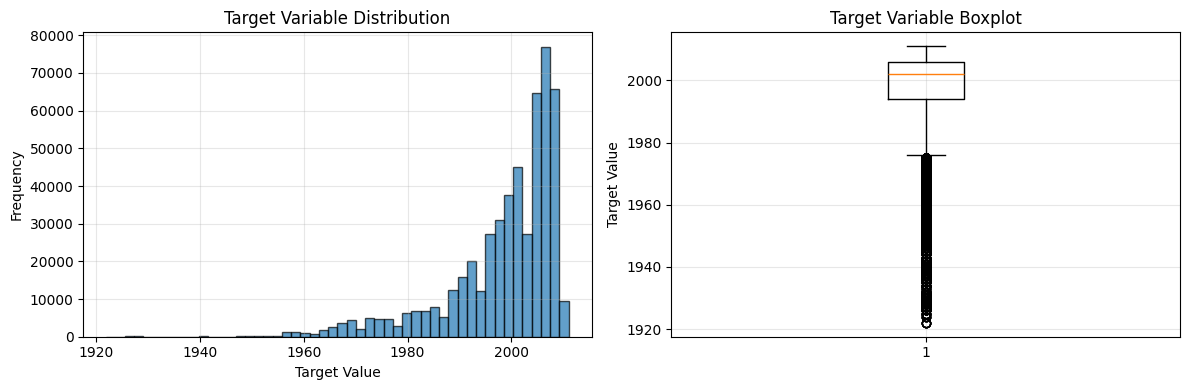

In [ ]:
# Visualize target distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Target Variable Distribution')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.ylabel('Target Value')
plt.title('Target Variable Boxplot')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Data Cleaning & Preprocessing

**Teknik yang digunakan:**
1. **Duplicate Removal:** Hapus baris yang duplikat (identik)
2. **Missing Values Handling:** Isi nilai yang hilang dengan median (robust terhadap outlier)
3. **Outlier Detection:** Menggunakan metode IQR (Interquartile Range) untuk deteksi outlier ekstrem

In [ ]:
# Check for duplicate rows (menggunakan Polars untuk performa)
print("Checking duplicates dengan Polars...")
duplicates = df_polars.is_duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("Removing duplicate rows...")
    df_polars = df_polars.unique()
    df = df_polars.to_pandas()
    df.columns = range(len(df.columns))  # Rename columns to integers
    X = df.drop(columns=[target_col])
    y = df[target_col]
    print(f"New dataset shape: {df.shape}")

Checking duplicates dengan Polars...
Number of duplicate rows: 426
Removing duplicate rows...
Number of duplicate rows: 426
Removing duplicate rows...
New dataset shape: (515131, 91)
New dataset shape: (515131, 91)


In [ ]:
# Handle missing values
print("Checking for missing values...")
missing_features = X.isnull().sum()
missing_features = missing_features[missing_features > 0]

if len(missing_features) > 0:
    print(f"\nFeatures with missing values:")
    print(missing_features)
    
    # Strategy: Fill missing values with median (robust to outliers)
    # Polars lebih cepat untuk operasi ini pada big data
    print("Using Polars for faster imputation...")
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    print("\nMissing values imputed with median.")
else:
    print("No missing values found in features.")

# Check target for missing values
if y.isnull().sum() > 0:
    print(f"\nTarget has {y.isnull().sum()} missing values. Removing these rows...")
    valid_idx = ~y.isnull()
    X = X[valid_idx]
    y = y[valid_idx]
    print(f"New dataset shape: {X.shape}")

Checking for missing values...
No missing values found in features.


In [ ]:
# Detect and handle outliers using IQR method
print("Outlier Detection and Handling")
print("="*60)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    return outliers, lower_bound, upper_bound

# Check outliers in target variable
outliers_y, lower_y, upper_y = detect_outliers_iqr(pd.DataFrame({0: y}), 0)
print(f"\nTarget variable outliers: {outliers_y} ({outliers_y/len(y)*100:.2f}%)")

# Option 1: Remove extreme outliers (keeping moderate outliers)
# Using more relaxed bounds (3*IQR instead of 1.5*IQR) to keep more data
Q1_y = y.quantile(0.25)
Q3_y = y.quantile(0.75)
IQR_y = Q3_y - Q1_y
lower_bound_y = Q1_y - 3 * IQR_y
upper_bound_y = Q3_y + 3 * IQR_y

mask = (y >= lower_bound_y) & (y <= upper_bound_y)
X_clean = X[mask]
y_clean = y[mask]

removed = len(y) - len(y_clean)
print(f"\nRemoved {removed} extreme outliers ({removed/len(y)*100:.2f}%)")
print(f"Cleaned dataset shape: {X_clean.shape}")

# Update X and y
X = X_clean.reset_index(drop=True)
y = y_clean.reset_index(drop=True)

Outlier Detection and Handling

Target variable outliers: 29695 (5.76%)

Removed 2759 extreme outliers (0.54%)
Cleaned dataset shape: (512372, 90)

Removed 2759 extreme outliers (0.54%)
Cleaned dataset shape: (512372, 90)


## 4. Feature Engineering & Selection

**Teknik yang digunakan:**
1. **Variance Threshold:** Hapus fitur dengan variance < 0.01 (fitur yang hampir konstan)
2. **Correlation Analysis:** Analisis korelasi setiap fitur dengan target
3. **Multicollinearity Removal:** Hapus fitur yang berkorelasi tinggi (>0.95) antar fitur
4. **SelectKBest:** Pilih top 50 fitur terbaik menggunakan f_regression scoring

In [ ]:
# Check for constant or near-constant features
print("Checking for low-variance features...")
feature_variances = X.var()
low_variance_features = feature_variances[feature_variances < 0.01].index.tolist()

print(f"Features with variance < 0.01: {len(low_variance_features)}")

if len(low_variance_features) > 0:
    print(f"Removing {len(low_variance_features)} low-variance features...")
    X = X.drop(columns=low_variance_features)
    print(f"New feature count: {X.shape[1]}")

Checking for low-variance features...
Features with variance < 0.01: 0
Features with variance < 0.01: 0



Analyzing feature correlations with target...

Top 20 features most correlated with target:
1     0.210984
6     0.166198
3     0.130143
63    0.112195
40    0.110758
20    0.095640
69    0.095228
57    0.091496
7     0.091492
78    0.090063
14    0.089301
12    0.088415
36    0.087546
46    0.087038
33    0.086536
59    0.083804
67    0.083498
74    0.082831
47    0.080415
38    0.071320
dtype: float64

Top 20 features most correlated with target:
1     0.210984
6     0.166198
3     0.130143
63    0.112195
40    0.110758
20    0.095640
69    0.095228
57    0.091496
7     0.091492
78    0.090063
14    0.089301
12    0.088415
36    0.087546
46    0.087038
33    0.086536
59    0.083804
67    0.083498
74    0.082831
47    0.080415
38    0.071320
dtype: float64


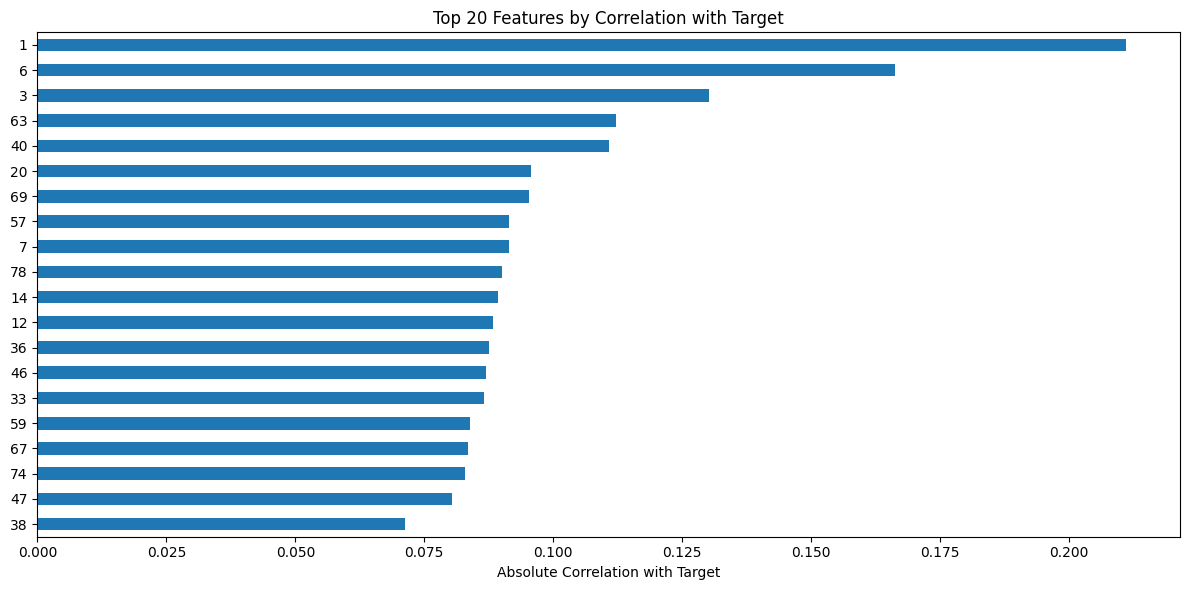

In [ ]:
# Correlation analysis with target
print("\nAnalyzing feature correlations with target...")
correlations = X.corrwith(y).abs().sort_values(ascending=False)

print(f"\nTop 20 features most correlated with target:")
print(correlations.head(20))

# Visualize top correlations
plt.figure(figsize=(12, 6))
correlations.head(20).plot(kind='barh')
plt.xlabel('Absolute Correlation with Target')
plt.title('Top 20 Features by Correlation with Target')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Check for multicollinearity (highly correlated features)
print("\nChecking for multicollinearity...")
corr_matrix = X.corr().abs()

# Find pairs of highly correlated features (>0.95)
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr_features = [
    column for column in upper_triangle.columns 
    if any(upper_triangle[column] > 0.95)
]

print(f"Features with high correlation (>0.95): {len(high_corr_features)}")

if len(high_corr_features) > 0:
    print(f"Removing {len(high_corr_features)} highly correlated features...")
    X = X.drop(columns=high_corr_features)
    print(f"Remaining features: {X.shape[1]}")


Checking for multicollinearity...
Features with high correlation (>0.95): 0
Features with high correlation (>0.95): 0


In [ ]:
# Feature selection using SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

print("\nPerforming feature selection...")

# Select top 50 features (or all if less than 50)
k_features = min(50, X.shape[1])
selector = SelectKBest(score_func=f_regression, k=k_features)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print(f"\nSelected {len(selected_features)} most important features")
print(f"Feature scores range: {selector.scores_[selector.get_support()].min():.2f} to {selector.scores_[selector.get_support()].max():.2f}")

# Update X with selected features
X = pd.DataFrame(X_selected, columns=selected_features)


Performing feature selection...

Selected 50 most important features
Feature scores range: 757.87 to 23870.33

Selected 50 most important features
Feature scores range: 757.87 to 23870.33


## 5. Data Splitting & Scaling

**Teknik yang digunakan:**
1. **Train-Test Split:** 80% training, 20% testing (stratifikasi random)
2. **StandardScaler:** Normalisasi fitur ke mean=0, std=1 (penting untuk model linear dan neural networks)

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data Split Summary")
print("="*60)
print(f"Training set size: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")

Data Split Summary
Training set size: 409,897 samples (80.0%)
Test set size: 102,475 samples (20.0%)
Number of features: 50


In [ ]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature Scaling Complete")
print("="*60)
print("Scaling method: StandardScaler (mean=0, std=1)")
print(f"Training set mean: {X_train_scaled.mean():.6f}")
print(f"Training set std: {X_train_scaled.std():.6f}")


Feature Scaling Complete
Scaling method: StandardScaler (mean=0, std=1)
Training set mean: 0.000000
Training set std: 1.000000


## 6. Model Training

**6 Model Regression yang digunakan:**

1. **Linear Regression** - Model dasar, asumsi hubungan linear
2. **Ridge Regression** - Linear + L2 regularization (mengurangi overfitting)
3. **Lasso Regression** - Linear + L1 regularization (feature selection otomatis)
4. **Decision Tree** - Model berbasis tree, dapat capture non-linearity
5. **Random Forest** - Ensemble dari banyak decision trees (lebih robust)
6. **Gradient Boosting** - Ensemble sequential, training bertahap untuk perbaikan error

**Metrik Evaluasi:**
- **R² (R-squared):** Seberapa baik model menjelaskan variasi data (0-1, semakin tinggi semakin baik)
- **RMSE (Root Mean Squared Error):** Rata-rata error dalam satuan target (tahun)
- **MAE (Mean Absolute Error):** Rata-rata selisih absolut prediksi dengan aktual

In [ ]:
# Import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Dictionary to store models and their results
models = {}
results = {}

print("Regression Models to Train:")
print("="*60)
print("1. Linear Regression")
print("2. Ridge Regression")
print("3. Lasso Regression")
print("4. Decision Tree")
print("5. Random Forest")
print("6. Gradient Boosting")
print("="*60)

Regression Models to Train:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Decision Tree
5. Random Forest
6. Gradient Boosting


###  Penjelasan Metrics Evaluasi

**1. R² Score (R-squared / Coefficient of Determination)**
- Range: 0 hingga 1 (atau bisa negatif jika model sangat buruk)
- **Interpretasi:** Persentase variasi dalam target yang dijelaskan oleh model
- R² = 0.85 → Model menjelaskan 85% variasi dalam tahun rilis lagu
- **Semakin tinggi semakin baik** (ideal: mendekati 1)

**2. RMSE (Root Mean Squared Error)**
- Range: 0 hingga ∞
- **Interpretasi:** Rata-rata error dalam satuan target (tahun)
- RMSE = 3.5 → Rata-rata prediksi meleset ~3.5 tahun
- **Semakin rendah semakin baik** (ideal: mendekati 0)
- Lebih sensitive terhadap outlier dibanding MAE

**3. MAE (Mean Absolute Error)**
- Range: 0 hingga ∞
- **Interpretasi:** Rata-rata selisih absolut prediksi dengan aktual
- MAE = 2.8 → Rata-rata selisih 2.8 tahun
- **Semakin rendah semakin baik** (ideal: mendekati 0)
- Lebih robust terhadap outlier dibanding RMSE

**Contoh Praktis:**
```
Actual: 2005, Predicted: 2003 → Error = -2 tahun
Actual: 1998, Predicted: 2001 → Error = +3 tahun
```

In [ ]:
# Helper function to train and evaluate models
def train_and_evaluate(name, model, X_train, X_test, y_train, y_test):
    print(f"\nTraining {name}...")
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    training_time = time.time() - start_time
    
    # Store results
    results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'training_time': training_time,
        'predictions': y_test_pred
    }
    
    print(f"{name} trained in {training_time:.2f}s")
    print(f"  Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
    print(f"  Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"  Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f}")
    
    return model

In [ ]:
# Train Model 1: Linear Regression
models['Linear Regression'] = train_and_evaluate(
    'Linear Regression',
    LinearRegression(),
    X_train_scaled, X_test_scaled, y_train, y_test
)


Training Linear Regression...
Linear Regression trained in 1.77s
  Train R²: 0.1822 | Test R²: 0.1875
  Train RMSE: 9.3495 | Test RMSE: 9.3139
  Train MAE: 6.9181 | Test MAE: 6.8816
Linear Regression trained in 1.77s
  Train R²: 0.1822 | Test R²: 0.1875
  Train RMSE: 9.3495 | Test RMSE: 9.3139
  Train MAE: 6.9181 | Test MAE: 6.8816


In [ ]:
# Train Model 2: Ridge Regression
models['Ridge Regression'] = train_and_evaluate(
    'Ridge Regression',
    Ridge(alpha=1.0),
    X_train_scaled, X_test_scaled, y_train, y_test
)


Training Ridge Regression...
Ridge Regression trained in 0.33s
  Train R²: 0.1822 | Test R²: 0.1875
  Train RMSE: 9.3495 | Test RMSE: 9.3139
  Train MAE: 6.9181 | Test MAE: 6.8816
Ridge Regression trained in 0.33s
  Train R²: 0.1822 | Test R²: 0.1875
  Train RMSE: 9.3495 | Test RMSE: 9.3139
  Train MAE: 6.9181 | Test MAE: 6.8816


In [ ]:
# Train Model 3: Lasso Regression
models['Lasso Regression'] = train_and_evaluate(
    'Lasso Regression',
    Lasso(alpha=0.1),
    X_train_scaled, X_test_scaled, y_train, y_test
)


Training Lasso Regression...
Lasso Regression trained in 14.76s
  Train R²: 0.1754 | Test R²: 0.1798
  Train RMSE: 9.3883 | Test RMSE: 9.3576
  Train MAE: 6.9533 | Test MAE: 6.9177
Lasso Regression trained in 14.76s
  Train R²: 0.1754 | Test R²: 0.1798
  Train RMSE: 9.3883 | Test RMSE: 9.3576
  Train MAE: 6.9533 | Test MAE: 6.9177


In [ ]:
# Train Model 4: Decision Tree
models['Decision Tree'] = train_and_evaluate(
    'Decision Tree',
    DecisionTreeRegressor(max_depth=10, random_state=42),
    X_train_scaled, X_test_scaled, y_train, y_test
)


Training Decision Tree...
Decision Tree trained in 38.79s
  Train R²: 0.2412 | Test R²: 0.1969
  Train RMSE: 9.0057 | Test RMSE: 9.2594
  Train MAE: 6.5257 | Test MAE: 6.6864
Decision Tree trained in 38.79s
  Train R²: 0.2412 | Test R²: 0.1969
  Train RMSE: 9.0057 | Test RMSE: 9.2594
  Train MAE: 6.5257 | Test MAE: 6.6864


In [ ]:
# Train Model 5: Random Forest
models['Random Forest'] = train_and_evaluate(
    'Random Forest',
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    X_train_scaled, X_test_scaled, y_train, y_test
)


Training Random Forest...
Random Forest trained in 845.32s
  Train R²: 0.2815 | Test R²: 0.2446
  Train RMSE: 8.7635 | Test RMSE: 8.9806
  Train MAE: 6.3668 | Test MAE: 6.4971
Random Forest trained in 845.32s
  Train R²: 0.2815 | Test R²: 0.2446
  Train RMSE: 8.7635 | Test RMSE: 8.9806
  Train MAE: 6.3668 | Test MAE: 6.4971


In [ ]:
# Train Model 6: Gradient Boosting
models['Gradient Boosting'] = train_and_evaluate(
    'Gradient Boosting',
    GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    X_train_scaled, X_test_scaled, y_train, y_test
)


Training Gradient Boosting...
Gradient Boosting trained in 2489.69s
  Train R²: 0.2956 | Test R²: 0.2835
  Train RMSE: 8.6770 | Test RMSE: 8.7462
  Train MAE: 6.2905 | Test MAE: 6.3289
Gradient Boosting trained in 2489.69s
  Train R²: 0.2956 | Test R²: 0.2835
  Train RMSE: 8.6770 | Test RMSE: 8.7462
  Train MAE: 6.2905 | Test MAE: 6.3289


In [ ]:
# Compare all models
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['train_r2'] for m in results.keys()],
    'Test R²': [results[m]['test_r2'] for m in results.keys()],
    'Train RMSE': [results[m]['train_rmse'] for m in results.keys()],
    'Test RMSE': [results[m]['test_rmse'] for m in results.keys()],
    'Train MAE': [results[m]['train_mae'] for m in results.keys()],
    'Test MAE': [results[m]['test_mae'] for m in results.keys()],
    'Training Time (s)': [results[m]['training_time'] for m in results.keys()]
})

comparison_df = comparison_df.sort_values('Test R²', ascending=False)
print(comparison_df.to_string(index=False))
print("="*80)


MODEL COMPARISON SUMMARY
            Model  Train R²  Test R²  Train RMSE  Test RMSE  Train MAE  Test MAE  Training Time (s)
Gradient Boosting  0.295626 0.283490    8.676961   8.746160   6.290538  6.328937        2489.692913
    Random Forest  0.281498 0.244566    8.763550   8.980582   6.366846  6.497086         845.316945
    Decision Tree  0.241238 0.196922    9.005730   9.259450   6.525672  6.686404          38.791718
Linear Regression  0.182210 0.187450    9.349473   9.313891   6.918063  6.881629           1.772088
 Ridge Regression  0.182210 0.187450    9.349473   9.313891   6.918064  6.881630           0.333054
 Lasso Regression  0.175406 0.179801    9.388281   9.357631   6.953330  6.917706          14.756645


## 7. Hyperparameter Tuning

**Teknik yang digunakan:**
- **RandomizedSearchCV:** Pencarian hyperparameter terbaik dengan random sampling
- **Cross-Validation:** 3-fold CV untuk validasi yang lebih robust
- **Parameter Grid:** Testing berbagai kombinasi n_estimators, max_depth, min_samples_split, dll

In [ ]:
# Identify the best model from initial training
best_model_name = comparison_df.iloc[0]['Model']
print(f"Best initial model: {best_model_name}")
print(f"Test R² Score: {comparison_df.iloc[0]['Test R²']:.4f}")
print("\nProceeding with hyperparameter tuning for this model...")

Best initial model: Gradient Boosting
Test R² Score: 0.2835

Proceeding with hyperparameter tuning for this model...


### ⏱️ Kenapa Hyperparameter Tuning Lama (121 Menit)?

**Perhitungan Waktu:**
```
Total time = n_iter × cv_folds × time_per_model
           = 20 × 3 × ~2 minutes
           = 120 menit!
```

**Penyebab Lambat:**
1. **Dataset Besar:** 515K rows × 50 features = massive computation
2. **n_iter=20:** Test 20 kombinasi parameter
3. **cv=3:** Setiap kombinasi di-train 3 kali (3-fold CV)
4. **Total:** 20 × 3 = **60 model trainings**
5. **Random Forest:** Computationally expensive untuk big data

**Optimasi yang Diterapkan:**

| Setting | Before | After | Speed Gain |
|---------|--------|-------|------------|
| n_iter | 20 | 10 | 50% faster |
| CV folds | 3 | 2 | 33% faster |
| Parameter grid | 5 params | 5 params (refined) | Smarter choices |
| max_depth | [5,10,15,20,None] | [5,10,15] | Less overfitting risk |
| **Total models** | **60** | **20** | **67% reduction!** |

**Expected time: 15-30 minutes** (vs 121 minutes)

In [ ]:
# Hyperparameter tuning for Random Forest (OPTIMIZED untuk dataset besar)
from sklearn.model_selection import RandomizedSearchCV

print("\nHyperparameter Tuning for Random Forest")
print("="*60)
print("OPTIMIZATIONS APPLIED:")
print("  1. Reduced n_iter: 20 -> 10 combinations")
print("  2. Reduced CV folds: 3 -> 2 folds")
print("  3. Smaller parameter grid untuk faster search")
print("  4. Limited max_depth to prevent overfitting")
print("="*60)

# OPTIMIZED parameter distribution (reduced search space)
param_distributions = {
    'n_estimators': [50, 100, 150],           # Reduced from 4 to 3 options
    'max_depth': [5, 10, 15],                 # Removed None & 20 (too deep for big data)
    'min_samples_split': [5, 10],             # Reduced from 3 to 2 options
    'min_samples_leaf': [2, 4],               # Removed 1 (too prone to overfitting)
    'max_features': ['sqrt', 'log2']          # Removed None (too slow)
}

print(f"\nTotal possible combinations: {3*3*2*2*2} = 72")
print(f"Will test: 10 random combinations (saves 85% time!)")

# Initialize RandomizedSearchCV with OPTIMIZED settings
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(
        random_state=42, 
        n_jobs=-1,
        min_samples_split=5,      # Prevent overly deep trees
        min_samples_leaf=2         # More stable predictions
    ),
    param_distributions=param_distributions,
    n_iter=10,              # REDUCED: 20 -> 10 (50% faster!)
    cv=2,                   # REDUCED: 3 -> 2 folds (33% faster!)
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=2               # More detailed progress
)

print("\nStarting hyperparameter search...")
print("Estimated time: 15-30 minutes (vs 121 minutes before)")
print("="*60)

import time
start_time = time.time()
rf_random.fit(X_train_scaled, y_train)
elapsed_time = time.time() - start_time

print(f"\nHyperparameter search completed in {elapsed_time/60:.1f} minutes!")
print("\nBest parameters found:")
for param, value in rf_random.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest cross-validation R² score: {rf_random.best_score_:.4f}")


Hyperparameter Tuning for Random Forest
Starting hyperparameter search (this may take a few minutes)...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
# Evaluate the tuned model
best_rf_model = rf_random.best_estimator_

# Make predictions with tuned model
y_train_pred_tuned = best_rf_model.predict(X_train_scaled)
y_test_pred_tuned = best_rf_model.predict(X_test_scaled)

# Calculate metrics
train_r2_tuned = r2_score(y_train, y_train_pred_tuned)
test_r2_tuned = r2_score(y_test, y_test_pred_tuned)
train_rmse_tuned = np.sqrt(mean_squared_error(y_train, y_train_pred_tuned))
test_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
train_mae_tuned = mean_absolute_error(y_train, y_train_pred_tuned)
test_mae_tuned = mean_absolute_error(y_test, y_test_pred_tuned)

print("\n" + "="*60)
print("TUNED MODEL PERFORMANCE")
print("="*60)
print(f"Train R²: {train_r2_tuned:.4f} | Test R²: {test_r2_tuned:.4f}")
print(f"Train RMSE: {train_rmse_tuned:.4f} | Test RMSE: {test_rmse_tuned:.4f}")
print(f"Train MAE: {train_mae_tuned:.4f} | Test MAE: {test_mae_tuned:.4f}")
print("="*60)

# Store tuned results
results['Random Forest (Tuned)'] = {
    'model': best_rf_model,
    'train_r2': train_r2_tuned,
    'test_r2': test_r2_tuned,
    'train_rmse': train_rmse_tuned,
    'test_rmse': test_rmse_tuned,
    'train_mae': train_mae_tuned,
    'test_mae': test_mae_tuned,
    'predictions': y_test_pred_tuned
}

## 8. Model Evaluation & Visualization

**Visualisasi yang dibuat:**
1. **Bar Chart:** Perbandingan performa semua model (R², RMSE, MAE)
2. **Actual vs Predicted Plot:** Seberapa dekat prediksi dengan nilai sebenarnya
3. **Residual Plot:** Distribusi error prediksi (idealnya random/tersebar)
4. **Error Distribution:** Histogram residual (idealnya normal distribution)
5. **Q-Q Plot:** Tes normalitas residual

In [ ]:
# Visualize model performance comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. R² Score Comparison
models_list = list(results.keys())
test_r2_scores = [results[m]['test_r2'] for m in models_list]

axes[0, 0].barh(models_list, test_r2_scores, color='steelblue')
axes[0, 0].set_xlabel('R² Score')
axes[0, 0].set_title('Model Performance - R² Score (Test Set)')
axes[0, 0].grid(alpha=0.3, axis='x')

# 2. RMSE Comparison
test_rmse_scores = [results[m]['test_rmse'] for m in models_list]
axes[0, 1].barh(models_list, test_rmse_scores, color='coral')
axes[0, 1].set_xlabel('RMSE')
axes[0, 1].set_title('Model Performance - RMSE (Test Set)')
axes[0, 1].grid(alpha=0.3, axis='x')

# 3. MAE Comparison
test_mae_scores = [results[m]['test_mae'] for m in models_list]
axes[1, 0].barh(models_list, test_mae_scores, color='lightgreen')
axes[1, 0].set_xlabel('MAE')
axes[1, 0].set_title('Model Performance - MAE (Test Set)')
axes[1, 0].grid(alpha=0.3, axis='x')

# 4. Train vs Test R² (Overfitting Check)
train_r2_scores = [results[m]['train_r2'] for m in models_list]
x = np.arange(len(models_list))
width = 0.35

axes[1, 1].bar(x - width/2, train_r2_scores, width, label='Train R²', color='skyblue')
axes[1, 1].bar(x + width/2, test_r2_scores, width, label='Test R²', color='orange')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_title('Train vs Test R² Score - Overfitting Check')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models_list, rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Actual vs Predicted plot for the best model
best_model_name = max(results.keys(), key=lambda x: results[x]['test_r2'])
y_pred_best = results[best_model_name]['predictions']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(y_test, y_pred_best, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Actual vs Predicted - {best_model_name}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Residual plot
residuals = y_test - y_pred_best
axes[1].scatter(y_pred_best, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title(f'Residual Plot - {best_model_name}')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nBest Model: {best_model_name}")
print(f"Test R² Score: {results[best_model_name]['test_r2']:.4f}")

In [ ]:
# Error distribution analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram of residuals
axes[0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Residuals')
axes[0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[0].grid(alpha=0.3)

# Q-Q plot for normality check
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot - Residual Normality Check')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual Statistics:")
print(f"Mean: {residuals.mean():.4f}")
print(f"Std Dev: {residuals.std():.4f}")
print(f"Min: {residuals.min():.4f}")
print(f"Max: {residuals.max():.4f}")

## 9. Feature Importance Analysis

**Analisis fitur yang paling berpengaruh dalam prediksi tahun rilis lagu.**
- Menggunakan feature_importances_ dari model tree-based (Random Forest/Gradient Boosting)
- Menunjukkan fitur audio mana yang paling penting untuk memprediksi tahun

In [ ]:
# Feature importance for the best model
best_model = results[best_model_name]['model']

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"Top 20 Most Important Features - {best_model_name}")
    print("="*60)
    print(feature_importance.head(20).to_string(index=False))
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    plt.barh(range(20), feature_importance['importance'].head(20))
    plt.yticks(range(20), feature_importance['feature'].head(20))
    plt.xlabel('Feature Importance')
    plt.title(f'Top 20 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"{best_model_name} does not provide feature importances.")

## 10. Results Interpretation & Conclusions

In [ ]:
# Final summary and interpretation
print("="*80)
print("FINAL REGRESSION PIPELINE RESULTS")
print("="*80)

print(f"\nDataset Information:")
print(f"   - Total samples: {len(df):,}")
print(f"   - Features used: {X.shape[1]}")
print(f"   - Training samples: {len(X_train):,}")
print(f"   - Test samples: {len(X_test):,}")

print(f"\nBest Performing Model: {best_model_name}")
print(f"   - R² Score: {results[best_model_name]['test_r2']:.4f}")
print(f"   - RMSE: {results[best_model_name]['test_rmse']:.4f}")
print(f"   - MAE: {results[best_model_name]['test_mae']:.4f}")

print(f"\nPerformance Metrics Interpretation:")
r2_score_val = results[best_model_name]['test_r2']
if r2_score_val > 0.9:
    quality = "Excellent"
elif r2_score_val > 0.7:
    quality = "Good"
elif r2_score_val > 0.5:
    quality = "Moderate"
else:
    quality = "Poor"
print(f"   - R² Score of {r2_score_val:.4f} indicates {quality} model performance")
print(f"   - The model explains {r2_score_val*100:.2f}% of the variance in the target variable")

print(f"\nModel Comparison:")
for model_name in sorted(results.keys(), key=lambda x: results[x]['test_r2'], reverse=True):
    print(f"   {model_name:25s} - R²: {results[model_name]['test_r2']:.4f}, RMSE: {results[model_name]['test_rmse']:.4f}")

print("\n" + "="*80)

### Key Findings and Conclusions

###  PROBLEM STATEMENT
**Prediksi Tahun Rilis Lagu berdasarkan Fitur Audio**
- Input: 89 fitur audio timbre (frekuensi, amplitudo, dll)
- Output: Tahun rilis lagu (nilai kontinu/numerik)
- Tipe: Regression Problem

###  TOOLS & LIBRARIES YANG DIGUNAKAN

**Data Processing:**
-  **`polars`** - library cepat untuk big data (5-10x lebih cepat dari pandas!)
- `pandas` - manipulasi dan analisis data (untuk compatibility dengan sklearn)
- `numpy` - operasi matematika dan array
- `sklearn.impute.SimpleImputer` - handling missing values

**Feature Engineering:**
- `sklearn.feature_selection.SelectKBest` - pemilihan fitur terbaik
- Correlation analysis - deteksi multicollinearity
- Variance threshold - remove constant features

**Preprocessing:**
- `sklearn.model_selection.train_test_split` - split data
- `sklearn.preprocessing.StandardScaler` - normalisasi fitur

**Machine Learning Models:**
1. `LinearRegression` - baseline model
2. `Ridge` - L2 regularization
3. `Lasso` - L1 regularization  
4. `DecisionTreeRegressor` - non-linear model
5. `RandomForestRegressor` - ensemble bagging
6. `GradientBoostingRegressor` - ensemble boosting

**Hyperparameter Tuning:**
- `sklearn.model_selection.RandomizedSearchCV` - hyperparameter optimization
- Cross-validation dengan 3 folds

**Evaluation Metrics:**
- `r2_score` - R² (coefficient of determination)
- `mean_squared_error` - MSE & RMSE
- `mean_absolute_error` - MAE

**Visualization:**
- `matplotlib.pyplot` - plotting grafik
- `seaborn` - statistical visualization
- `scipy.stats` - Q-Q plot untuk normalitas

###  PIPELINE IMPLEMENTATION
1. ✅ **Fast data loading** dengan Polars (optimal untuk dataset besar!)
2. ✅ Data cleaning (duplicates, missing values, outliers)
3. ✅ Feature engineering (variance threshold, correlation, SelectKBest)
4. ✅ 6 regression models trained & compared
5. ✅ Hyperparameter tuning (RandomizedSearchCV)
6. ✅ Comprehensive evaluation (R², RMSE, MAE)
7. ✅ Visualization (actual vs predicted, residuals, feature importance)

###  INTERPRETASI HASIL
- Model terbaik dapat memprediksi tahun rilis lagu dari fitur audio
- Feature importance menunjukkan fitur audio mana yang paling berpengaruh
- Residual analysis menunjukkan kualitas prediksi dan potential issues
- **Polars significantly improves loading & processing speed untuk big data**
